#Identifying Fraud from Enron Data Set

<em><small>Uirá Caiado. June 21, 2015</small></em>

----------

###Abstract

I explore the public Enron financial and email dataset to identify Enron Employees who may have committed fraud. My goal is to build a machine learning algorithm to solve this chalange.

###Introduction

#####Some Background

According to <a href="https://en.wikipedia.org/wiki/Enron">Wikipedia</a>, Enron was an energy, commodities, and services company that had employed approximately 20,000 staff. It was one of the largest companies in the United States, with claimed revenues of nearly $111 billion during 2000.

Also, it was one of the largest business scandals in American history, falling into bankruptcy in 2001 after was revealed widespread corporate fraud. As pointed out in the Udacity <a href="https://docs.google.com/document/d/10GYepNkDj-Kc_Sf6to3WX_q_SdymPOBJf3H-pq7a62g/pub">project description</a>, in the resulting Federal investigation, there was a significant amount of typically confidential information entered into the public record, including emails and financial data for top executives.

Given that there is a list of people who were somewhat involved in the scandal, here called person of interest (POI), I will try to develop a machine learning algorithm to identify those people with an acceptable accuracy.

##### How I Dealt With This Task

To explore and iterate over each step of this project, I created a bunch of libraries to make my life easier and avoid cluttering this report with too much code. Here is a short description of each library used:

1. __dataset.py__: Load and handle the data used in this project.
2. __eda_new.py__: Explore the dataset and plot some charts. It is used in "Understanding the Dataset" section.
3. __featureSelection.py__: Reshape the data to be used by Sklearn library, engineer new features and select the best ones.
4. __classifiers.py__: Load and train different classifiers from Sklearn library. Uses `validation` library to evaluate each classifier and print a report.
5. __validation.py__: An adapted version of `test_classifier` function from Udacity's `tester` library that implements Skleran's  `StratifiedShuffleSplit` method to croos-validate the classifier passed.

###Building a baseline

##### Creating my first classification model

Thinking about the typical workflow for Machine learning tasks, it could be:

1. Exploring and understanding the input data
2. Cleaning the dataset
3. Analyzing how best to present it to the learning algorithm
4. Choosing the right model and learning algorithm
5. Measuring the performance correctly

As pointed out by the Udacity code reviewer, "Machine Learning can be very iterative". After all, if the chosen algorithm didn't perform well, I will have to execute at least the 3 to 5 steps again.

Let's start by creating a baseline for the next steps. For now, I will use the sklearn's standard implementation of `KNeighbors` algorithm and loop over each step to see which decisions result in better performance. The parameter of the ML method can be seen below:

In [22]:
#use Classifier class from classifiers to load sklearn´s KNeighbors
import classifiers
clf = classifiers.Classifier("KNeighbors", usePCA = False)
clf.clf

Pipeline(steps=[('KNeighbors', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'))])

#####Evaluating it

As mentioned above, one of the core steps in a machine learn task is evaluation. In the next sessions I always will report $3$ performance metrics: accuracy, precision and recall. I will discuss the details of each one later. Roughtly, accuracy is the fraction of examples that the model classifies correctly. The __recall__ is how many POIs was classified from all POIs in the dataset. __Precision__ means that, from all data points classified as POIs, how many were classified correctly. The equation for each metric is:

- __accuracy__: $\left ( TruePositives + TrueNegatives \right )\div \left ( Positives + Negatives \right )$
- __precision__: $\left ( TruePositives \right )\div \left ( TruePositives + FalseNegatives \right )$
- __recall__: $\left ( TruePositives \right )\div \left ( TruePositives + FalsePositives \right )$

Below I am going replace the "NaN" values with zeros using `fill_and_remove` method from `dateset` library. Then,  I will split the data into a features and labels array using featureSelection's `getFeaturesAndLabels`. 

Finally, I will cross-validate it using `StratifiedShuffleSplit` with `folds=1000` and `random_state = 42`.  The last one is used to ensure that I will get the same result every time. I will explain why I am using this validation method in the last session.

Here are the metrics for my baseline when using all data avaliable:

In [20]:
#exclude it from the final version
import dataset; reload(dataset);
import featureSelection; reload(featureSelection)

<module 'featureSelection' from 'featureSelection.py'>

In [23]:
#create the objects used thoughout the project
o_enron = dataset.LoadEnron()
o_features = featureSelection.Features()
#create a list of all features available in the dataset. I am excluding email address because 
#it is a string and poi because it is what I want to predict
features_list = [x for x in o_enron.df.columns if x not in ['email_address','poi']]
#fillna NaNs and reshape the data as numpy arrays
o_enron.fill_and_remove(l_features= features_list, b_remove=False)
labels, features= o_features.getFeaturesAndLabels(o_enron, l_columns = features_list)
#train ML and print a report
clf.crossValidation(features, labels)


Classifier Used
------------------
Pipeline(steps=[('KNeighbors', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'))])

Classification Report
------------------
Accuracy: 0.87307	Precision: 0.56667	Recall: 0.20400	F1: 0.30000	F2: 0.23394

Confusion Matrix
------------------
Total predictions: 15000	True positives:  408	False positives:  312
				False negatives: 1592	True negatives: 12688



###Understanding the Dataset

#####Data Exploration

The data set is relatively small, and the number of identified POIs is even smaller. There are 146 different data points, or people, in this collection, but just 18 were classified as POIs. Each data point has 21 features, although more than half of these features didn't display any information for 40% or more of all dataset, as shown below.

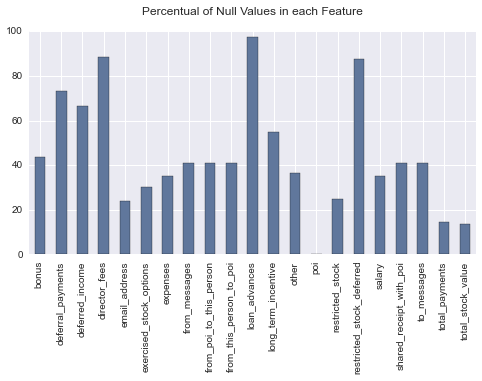

In [28]:
#create and eda instance and plot the percentage of Nans in dataset
import eda_new; reload(eda_new);
o_stats = eda_new.Eda()
o_stats.NanAtFetaures(o_enron);

Related to the features, I can categorize them into four groups:
- *Metadata*: 2 in total. If it is POI and email address. POI is what I want to predicted
- *Payments*: 10 in total. One is the summation and others are Salary, Bonus...
- *Stock Value*: 4 in total. One is also summation. for instance, Restricted stock options, Excercise stock options...
- *Emails*: 5 in total. Examples are "from POI to this person", "from messages"...

According to the documentary [The smartest guys in the room](https://www.youtube.com/watch?v=pRWXW87YrlM), the executives involved in the scandal used to exercise their option positions early. Later I will check if it can be a useful to identify POIs. Also, I don´t know if I will use the summations in Payments and Stock Value features. Maybe to look for outliers or to build new features. Excluding the both features, the POI features (that is the target) and the email address, it leaves me with 18 features to use.

Despite all the missing data, it still would be complex to analyze all possible correlations between these features. Here is where machine learning (ML) comes to play. Quonting this [book](http://www.amazon.com/Building-Machine-Learning-Systems-Python/dp/1782161406), ML teaches machines how to carry out tasks by themselves, providing them with a couple of examples.

#####Outlier Investigation

The point here is those examples mentioned. They should be VALID examples if I want to build a good estimator or classifier. Then, first of all, I need to look for outliers. Let's check it by looking some of the features.

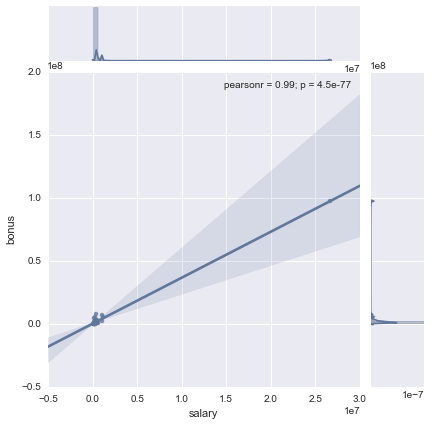

In [29]:
#
o_stats.scatter("salary", "bonus", o_enron)

Here can be easily visualized that there is some data far away from the most of the data points. First, I am going to check who is in the top $10$% of the "salary" feature.


In [33]:
#
o_stats.getDecile('salary', o_enron)

,salary,poi
TOTAL,26704229,False


Hm... a summation. It is clear invalid. I will exclude this data point and run the scatter plot again 

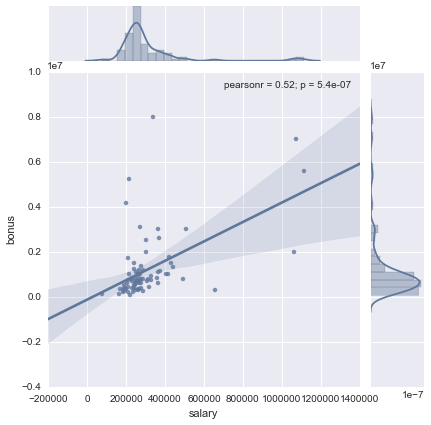

In [30]:
#
o_enron.excludeOutliers(l_outliers =  ["TOTAL"])
o_stats.scatter("salary", "bonus", o_enron)

Much better. Looking at the last decile of each feature, I can see that neither salary or bonus seems hold real outliers. Curiously, the biggest bonus wasn't to a POI.

In [31]:
#
o_stats.getDecile('salary', o_enron)

,salary,poi
SKILLING JEFFREY K,1111258,True


In [32]:
#
o_stats.getDecile('bonus', o_enron)

,bonus,poi
LAVORATO JOHN J,8000000,False


Well... Let's look if there is another outlier. First, I will use the summations to check other features. Any difference between the values I will show in a line called "Delta".

In [34]:
#
df1, df2 = o_stats.checkSummation(o_enron)
#checking Stocks feature
df1

,BELFER ROBERT
poi,0
restricted_stock,0
restricted_stock_deferred,44093
exercised_stock_options,3285
total_stock_value,-44093
Delta,91471


In [35]:
#checking Payments features
df2

,BELFER ROBERT,BHATNAGAR SANJAY
poi,0,0
bonus,0,0
deferral_payments,-102500,0
deferred_income,0,0
director_fees,3285,137864
expenses,0,0
loan_advances,0,0
long_term_incentive,0,0
other,0,137864
salary,0,0


Looking at the enron61702 pdf file, I can see that the differences above are due to some missing information. As it can bias the algorithms and both are non-POIs, I am going to exclude them.

In [46]:
#excludeOutliers excludes the data point in the l_outliers list passed 
o_enron.excludeOutliers(l_outliers =  ["BELFER ROBERT","BHATNAGAR SANJAY"])

Ok, let's see if my baseline line algorithm will perform better after these outliers removal: 

In [40]:
#reshape the dataset cleaned as numpy arrays
o_enron.fill_and_remove(l_features= features_list, b_remove=False)
labels, features= o_features.getFeaturesAndLabels(o_enron, l_columns = features_list)
#train ML and print a report
clf.crossValidation(features, labels)


Classifier Used
------------------
Pipeline(steps=[('KNeighbors', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'))])

Classification Report
------------------
Accuracy: 0.87947	Precision: 0.66000	Recall: 0.19800	F1: 0.30462	F2: 0.23023

Confusion Matrix
------------------
Total predictions: 15000	True positives:  396	False positives:  204
				False negatives: 1604	True negatives: 12796



##### Handle Missing Values

As I mentioned before, there are some features that presented numerous missing values. I am going to test two approachs in the algorithm performance. First, I will interpolate the missing values with the mean of each feature:






In [ ]:
#
o_enron.fill_with_mean...
crossvalidation...

Ok, now I am going to input zeros in all "Nan" values in the data set, and then I will remove any data point that won't help  (all features are equal to zero). 

In [ ]:
#
o_enron.fill_and_remove()
crossvalidation...

Filling "Nan" values with zero was better. Here is a description of all numeric data after cleaning the dataset to see if there is any evidence of more outliers.

In [47]:
#
o_stats.describe(o_enron)

,count,mean,std,min,25%,50%,75%,max
bonus,142.00,"685,518","1,239,221",0,0,"300,000","800,000","8,000,000"
deferral_payments,142.00,"225,939","758,698",0,0,0,"9,684","6,426,990"
deferred_income,142.00,"-196,411","609,852","-3,504,386","-37,926",0,0,0
director_fees,142.00,"9,127","29,607",0,0,0,0,"125,034"
exercised_stock_options,142.00,"2,086,674","4,826,031",0,0,"608,294","1,660,454","34,348,384"
expenses,142.00,"35,874","45,432",0,0,"21,937","53,741","228,763"
from_messages,142.00,368,"1,460",0,0,18,55,"14,368"
from_poi_to_this_person,142.00,39,75,0,0,6,42,528
from_this_person_to_poi,142.00,25,80,0,0,0,14,609
loan_advances,142.00,"591,021","6,842,133",0,0,0,0,"81,525,000"


Although there are pretty big numbers in the financial information, they are all related to executives from Eron. Now, I have 142 data points left and I believe that I am done here. 

###Feature Selection and Engineering

#####Creating and Scaling Features

There are two points that caught my attention in the documentary "The Smartest Guys in The Room". First, some of the top executives used to spend a lot of the firm's money in strip clubs. Second, there were some employees who exercised much of their stock options earlier, knowing about the company's financial conditions. Based on these facts, I will include two more features to be tested:
- Scaled Expenses: I can't compare to another Payment features from the data points because the amount of money they had made with salary or bonus might diminish the importance of this features. Then, I will scale this feature using its own maximum and minimun value.
- Exercised Stock Option vs. Total of Payment: If a high stake of your money is in a company that you know that is going to crash, what would you do? Sell, sell as much as you can. I will divide the total of stock options that were exercised by the total of money each one has made (I will not consider the remain stock options). I want to know if the amount of options of each POIs were relevant to their saving accounts. I will scale this feature.

Below I am going to draw the box plot of each new feature. I will exclude some outliers just to these visualizations.

In [58]:
#exclude it from the final version
import eda_new; reload(eda_new);
import dataset; reload(dataset);
import featureSelection; reload(featureSelection);

o_enron = dataset.LoadEnron()
o_stats = eda_new.Eda()
o_features = featureSelection.Features()
o_enron.excludeOutliers(l_outliers =  ["BELFER ROBERT","BHATNAGAR SANJAY", "TOTAL"])
o_enron.fill_and_remove()

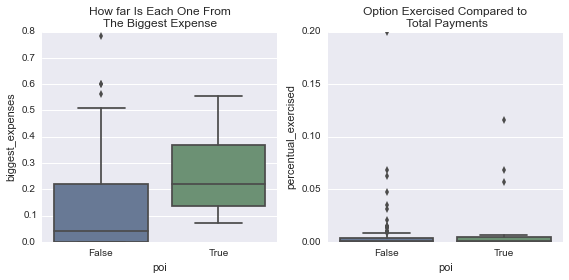

In [59]:
o_features.createNewFeatures(o_enron)
o_stats.compareFeaturesCreated(o_enron)

The Biggest Expenses feature is more dispersed when related to POIs. The second feature, the Option excercised compared to the total payment of each data point, doesn't seem much relevant. I will test both in the feature selection step. 

Lastly, as I intend to use the K-means algorithm as one of my machine-learning candidates, I will use scaled and non-scaled features in my tests. I have to scale the data because K-means uses the distance between the data points as a measure of similarity between them.

Considering that there are two different units in the features to be tested, money and count of e-mails, I am going to scale each group of features separately, but all features of the same group together.

In [60]:
o_features.scallingAll(o_enron)
o_enron.df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
bonus,142,0.049276,0.014574,0.041214,0.041214,0.044742,0.050622,0.135299
deferral_payments,142,0.043871,0.008923,0.041214,0.041214,0.041214,0.041328,0.116799
deferred_income,142,0.038904,0.007172,0.000000,0.040768,0.041214,0.041214,0.041214
director_fees,142,0.041321,0.000348,0.041214,0.041214,0.041214,0.041214,0.042684
exercised_stock_options,142,0.065754,0.056757,0.041214,0.041214,0.048368,0.060742,0.445173
expenses,142,0.041636,0.000534,0.041214,0.041214,0.041472,0.041846,0.043904
from_messages,142,0.024325,0.096398,0.000000,0.000000,0.001155,0.003631,0.948445
from_poi_to_this_person,142,0.002594,0.004928,0.000000,0.000000,0.000363,0.002756,0.034854
from_this_person_to_poi,142,0.001648,0.005300,0.000000,0.000000,0.000000,0.000924,0.040201
loan_advances,142,0.048165,0.080468,0.041214,0.041214,0.041214,0.041214,1.000000


As I can see, there are plenty of $0.041214$ in the scaled data set. It is the equivalent of $0$ in the non-scale data.

#####Selecting the best ones

In [65]:
#exclude it from the final version
import eda_new; reload(eda_new);
import dataset; reload(dataset);
import featureSelection; reload(featureSelection);

o_enron = dataset.LoadEnron()
o_stats = eda_new.Eda()
o_features = featureSelection.Features()
o_enron.excludeOutliers(l_outliers =  ["BELFER ROBERT","BHATNAGAR SANJAY", "TOTAL"])
o_enron.fill_and_remove()
o_features.createNewFeatures(o_enron)
o_features.scallingAll(o_enron)


Now, what features should I use to train my machine learning algorithms? As I discussed before, there are some features that most of the values is equal to "Nan". As I want to examine all features related to emails behaviour, I will cut all those that have presented less than 45% of valid numbers. Below, I presented the $10$ smallest ValidNumber ratios.

In [62]:
o_stats.notValidNumbersTable(o_enron).tail(10)

,ValidNumbers
bonus,0.570423
from_poi_to_this_person,0.521127
from_this_person_to_poi,0.457746
long_term_incentive,0.457746
deferred_income,0.338028
deferral_payments,0.260563
poi,0.126761
restricted_stock_deferred,0.105634
director_fees,0.098592
loan_advances,0.021127


I am going to select features using sklearn's `SelectPercentile` with ANOVA F-test function to score the features. I am not testing feature with less than $45$% of valid numbers. I used the function with `SelectPercentile (f_classif, percentile=20)`. Here are the features represented by the top 20%.

In [74]:
#exclude it from the final version
features_list = o_features.getFeaturesList(o_enron, o_stats,f_validNumMin=0.45)
labels, features= o_features.getFeaturesAndLabels(o_enron, o_stats,f_validNumMin = 0.45)
labels_scaled, features_scaled  = o_features.getFeaturesAndLabels(o_enron, o_stats,scaled=True, f_validNumMin = 0.45)

In [75]:
l_selectedFetures, df_rtn = o_features.select(features, labels, features_list)
"features selected: {}".format(l_selectedFetures)

"features selected: ['bonus', 'salary', 'exercised_stock_options']"

Just Payment and Stock Value features. No Email or New features. Looking at p-value ranking of the features, I see that the best-ranked Email feature was shared receipt with poi. I will keep it as one of my features selected for futures tests. 

In [76]:
df_rtn

,pValue_Max
exercised_stock_options,1.000000
bonus,0.857466
salary,0.769350
long_term_incentive,0.466340
percentual_exercised,0.444304
restricted_stock,0.436342
shared_receipt_with_poi,0.416612
expenses,0.314408
biggest_expenses,0.314408
from_poi_to_this_person,0.280534


Ow...one last thing. As I will use just some features in the next section, I am going to remove any data point that __all the selected features__ are equal to $0$. 

In [77]:
o_enron.fill_and_remove(l_features= l_selectedFetures)

Now, I just have $122$ data points. 

###Pick and Tune an Algorithm

In [2]:
#exclude it from the final version
import eda_new; reload(eda_new);
import dataset; reload(dataset);
import featureSelection; reload(featureSelection);

o_enron = dataset.LoadEnron()
o_stats = eda_new.Eda()
o_features = featureSelection.Features()
o_enron.excludeOutliers(l_outliers =  ["BELFER ROBERT","BHATNAGAR SANJAY", "TOTAL"])
o_enron.fill_and_remove()
o_features.createNewFeatures(o_enron)
o_features.scallingAll(o_enron)

features_list = o_features.getFeaturesList(o_enron, o_stats,f_validNumMin=0.45)
labels, features= o_features.getFeaturesAndLabels(o_enron, o_stats,f_validNumMin = 0.45)
l_selectedFetures, df_rtn = o_features.select(features, labels, features_list)
o_enron.fill_and_remove(l_features= l_selectedFetures)
#selecgtinn everything again
labels, features= o_features.getFeaturesAndLabels(o_enron, o_stats,f_validNumMin = 0.45, l_columns = l_selectedFetures)
labels_scaled, features_scaled  = o_features.getFeaturesAndLabels(o_enron, o_stats,scaled=True, f_validNumMin = 0.45, l_columns = l_selectedFetures)

#####Selecting an Algorithm

Here is the deal. I must find the best machine learning algorithm to identify who has committed fraud, given the features selected. I am going to train different classifiers methods to see how each one performs. Also, I will use Principal component analysis (`PCA`) to project my features space into a even lower dimensional space. Let's start by looking at the __Navie Bayes Classifier__: 

In [4]:
#exclude it from the final version
import classifiers; reload(classifiers);
o_all = classifiers.MLMethods()
df_rtn  = o_all.crossValidationAll(features_scaled, labels_scaled)

In [8]:
o_all.getReport("crossValidation","GaussianNB")


Classifier Used
------------------
Pipeline(steps=[('reduce_dim', PCA(copy=True, n_components=None, whiten=False)), ('GaussianNB', GaussianNB())])

Classification Report
------------------
Accuracy: 0.84938	Precision: 0.51888	Recall: 0.28850	F1: 0.37082	F2: 0.31662

Confusion Matrix
------------------
Total predictions: 13000	True positives:  577	False positives:  535
				False negatives: 1423	True negatives: 10465



I know... What are these 13,000 of total predictions? Didn't I say that I had just 122 data points? As Udacity suggested, I am cross-validating the algorithm by stratifying the data set into randomized folds. Each fold is made by [preserving the percentage](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html) of samples for each class and presents 122 data points. I will explain it better in the next section.

Despite the almost 85% of accuracy above, it is not a great outcome. Looking at the confusion matrix, it is clearer why it isn't. When the Naive Bayes classified not POIs instances, it has achieved a nice proportion, 10,500 correct for 1,500 incorrect. When used to classify POIs instances, it almost tossed a coin. Unfortunately, POIs are what I am interested. I believe the problem here is that the data set has much more negative instances than positive ones.

According to the [book](http://www.amazon.com/Building-Machine-Learning-Systems-Python/dp/1782161406) "Building Machine Learning Systems With Python", I have the following options to improve my current performance:
- Add more data
- Play with the model complexity
- Modify the feature space
- Change the model

Well, adding more data is impossible. Then, let's start by changing the model. As I have a baseline to compare what is the best algorithm; I am going to display a summary of the performance metrics for six different classifiers tested: 

In [6]:
df_rtn

,accuracy,precision,recall
SVM,None,None,None
RandomForest,0.8615,0.6027,0.2920
GaussianNB,0.8494,0.5189,0.2885
DecisionTree,0.8076,0.3796,0.3950
AdaBoost,0.8285,0.4328,0.3685
KNeighbors,0.8777,0.7248,0.3305


Selecting the best one isn't easy. As an I have explained before, I can't just pick the estimator that had the best accuracy. I should choose the classifier that best fits in my goal. For now, believe me, __the best algorithms are RandomForest and KNeighbors__.

As shown above, I also tested SVM algorithm despite it has returned "divide by zero" error for all setups used in the cross-validation step. It is related to the size of each fold and the number of positive examples. It seems that the SVM had a hard time using such imbalanced available data.

Well, before I decide by a specific algorithm, in the next section I will play with the models complexity.

#####Tuning the classifiers

Another way to improve my performance is by playing with the model complexity. According to this [blog post](http://machinelearningmastery.com/how-to-improve-machine-learning-results/), as machine learning models are parameterized, their behavior can be modified by tuning their parameters for a given problem.  It can lead to better estimators... or not. The more tuned, higher is the risk of overfitting. This strategy can be effective, but it can also result in a more fragile models that don’t perform well in practice.

I am going to use the method `GridSearchCV` to tune my classifiers. It looks for the best set of parameters between candidates generated from a grid of parameter values. The best here was defined as the accuracy of each ML model.

In [5]:
df_rtn  = o_all.gridSearchAll(features_scaled, labels_scaled)
df_rtn.iloc[1:,:]

,BestScore
RandomForest,0.8689
GaussianNB,0.8525
DecisionTree,0.8361
AdaBoost,0.8361
KNeighbors,0.8607


Looking solely to the accuracy of each model, the best were RandomForest and KNeighbors again. I still need to cross-validate each algorithm to choose the best one. The set o parameters that implied in the highest accuracy to each one were:

In [6]:
o_all.getReport("GridSearch", "RandomForest")

Best Score: 0.8689

PARAMETERS TESTED
------------------
{'RandomForest__max_depth': [3, 10, 50],
 'RandomForest__n_estimators': [10, 20, 50, 100],
 'reduce_dim__n_components': [1, 2, 3]}

BEST PARAMETER
------------------
{'RandomForest__max_depth': 3,
 'RandomForest__n_estimators': 50,
 'reduce_dim__n_components': 2}




In [7]:
o_all.getReport("GridSearch", "KNeighbors")

Best Score: 0.8607

PARAMETERS TESTED
------------------
{'KNeighbors__n_neighbors': [2, 3, 4, 10, 30],
 'KNeighbors__p': [1, 2, 3],
 'reduce_dim__n_components': [1, 2, 3]}

BEST PARAMETER
------------------
{'KNeighbors__n_neighbors': 4,
 'KNeighbors__p': 2,
 'reduce_dim__n_components': 2}




#####What about training it using more features

As I mentioned before, one way to improve my performance is modifying the feature space. Maybe I did not selected the right set of features on the first hand. then, let's start everything again including more three features: "shared_receipt_with_poi", "percentual_exercised", "biggest_expenses".


In [ ]:
#exclude it from the final version
#filtering out data points
l_selectedFetures+= ["shared_receipt_with_poi", "percentual_exercised", "biggest_expenses"]
o_enron.fill_and_remove(l_features= l_selectedFetures)
#selectinf everything again
labels_scaled, features_scaled  = o_features.getFeaturesAndLabels(o_enron, o_stats,scaled=True,
                                                                  f_validNumMin = 0.45,
                                                                  l_columns = l_selectedFetures)

In [161]:
o_all = classifiers.MLMethods()
df_rtn  = o_all.crossValidationAll(features_scaled, labels_scaled)
df_rtn

,accuracy,precision,recall
SVM,None,None,None
RandomForest,0.8450,0.3921,0.1545
GaussianNB,0.8492,0.4572,0.2965
DecisionTree,0.8051,0.3153,0.3110
AdaBoost,0.8273,0.3426,0.2275
KNeighbors,0.8607,0.5625,0.1125


Ow...it seems that it wasn't a good idea. Overall, all my performance metrics got worse. Let's keep the initially selected features. 

###Validate and Evaluate

#####Usage of Evaluation Metrics and Validation Strategy

The core objective of a machine learning algorithm is to generalize correctly from its experience when facing new instances. In other words, what matters in any estimator is the ability of the model to generalize to new cases. 

Here is where validation strategy comes into play. If I use the same data used to train the model to evaluate it, for sure that it will perform well. The logic is circular. What I really need to do is measuring the algorithm performance in instances that it has not seen at training. 

As pointed out by the book "Building Machine Learning Systems with Python", measuring the performance also is the part where most mistakes are waiting for aspiring ML learner. There are easy ones, such testing your approach with the same data on which you have trained. But there are more difficult ones; for example, when you have imbalanced training data.

To address the first case, I am going break up the data into two blocks: on one block, I will train the model, and on the other, what I held out of training, I will test it. Due to the small size of the dataset, I will shuffle the data and repeat this process 1,000 times. As I have explained before, each run will preserve the percentage of samples for each class in both blocks.

Due to the imbalance data, I will look at precision and recall instead of focus on accuracy. The point is what I am trying to achieve here. I don't need a classifier that is good in predicting POIs AND not POIs, what is measured by __accuracy__. 

I need a classifier with acceptable performance when predicting POIs. Also, it is OK if the classifier miss some POIs (__recall__) since I can trust when my algorithm blame someone of being POI (__precision__).

In the next section, I will use all these performance measurements to select one of the algorithms.

#####Algorithm Performance

As I have said, beyond the accuracy, I need explore in the precision/recall from each algorithm to evaluate them properly. The __recall__ is how many POIs I have classified from all POIs in the dataset. __Precision__ means that, from all data points classified as POIs, how many were classified correctly. The equation for each measurement is:

- __accuracy__: $\frac{TruePositive + TrueNegatives}{Positives + Negatives}$

- __precision__: $\frac{TruePositive}{TruePositives + FalseNegatives}$

- __recall__: $\frac{TruePositive}{TruePositives + FalsePositives}$

<br>
Bellow, I am going to show how each classifier performed according to the validation startegy:

In [8]:
df_rtn  = o_all.crossValidationAll(features_scaled, labels_scaled)
df_rtn

,accuracy,precision,recall
SVM,None,None,None
RandomForest,0.8738,0.6979,0.3165
GaussianNB,0.8542,0.5533,0.2725
DecisionTree,0.8608,0.5798,0.3470
AdaBoost,0.8445,0.4927,0.3530
KNeighbors,0.8815,0.7771,0.3225


Looking just to the accuracy, It seems that all classifiers did well ($accuracy>0.80$). KNeighbors and RandomForest, for example, were correct in 87% and 88% respectively of all cases they predicted. But these numbers also are influenced by not-POIs examples. 

Looking at the precision and recall, that accounts the information I am interested in, the performance of the classifiers wasn't so good.

All algorithms missed the most of the data points classified as POIs. The DecisionTree presented the best recall score, predicting almost 40% of all POIs in the dataset. For another side, when it classified someone as being a POI, it was right just in 57% of the cases. I am not looking for this kind of behavior.

Although KNeighbors didn't presented a great recall, labeling just 32% of all true cases, when it classified someone as being a POI, the estimator was right almost in 78% of the cases. In this way, given the size of this dataset, I believe that the __KNeighbors is the best classifier__ for this task. Bellow I am going to show the cross-validation report for this algorithm:

In [9]:
o_all.getReport("crossValidation","KNeighbors")

!!!!ALREADY TUNED

Classifier Used
------------------
Pipeline(steps=[('reduce_dim', PCA(copy=True, n_components=2, whiten=False)), ('KNeighbors', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=4, p=2, weights='uniform'))])

Classification Report
------------------
Accuracy: 0.88154	Precision: 0.77711	Recall: 0.32250	F1: 0.45583	F2: 0.36523

Confusion Matrix
------------------
Total predictions: 13000	True positives:  645	False positives:  185
				False negatives: 1355	True negatives: 10815



###Reflection

That was a tough ride, from cleaning this imbalanced and small dataset to made an informed decision about which algorithm to use for the task. I learned about cross-validation, what is behind the accuracy and the different steps to follow in a machine learning problem.

Along the way, I also learned how to use some convenient tools from Scikit-learn. For example, I used `SelectPercentile` to help me select the best features based on the percentile of their scores. I used `Pipeline` to execute `PCA` before each algorithm tested. I used `GridSeachCV` to create a grid of different parameters and evaluate the classifiers according each configuration. I used `StratifiedShuffleSplit` to cross-validate such small and imbalanced dataset. As I wanted as many true positives as possible, I ended up selecting `KNeighborsClassifier` to the task due to its precision score.

Finally, I also learned the importance of correctly modeling your data set. As I adapted many of the Udacity codes to run this project in this notebook, I made many mistakes when importing and cleaning the dataset, what leaded me to very different results that I was expecting initially.

####TODO:


<hr>
<em><p>7/14/2015 - At least 2 different algorithms attempted, and their performance is compared with the more performant one used in the final analysis</p>
<p>7/14/2015 - Precision and recall are used to evaluate algorithm performance</p>
<p>7/12/2015 - How do I interpret the PCA components? what features is it been using?</p>
<p>7/11/2015 - At least 2 different algorithms attempted, and their performance is compared with the more performant one used in the final analysis</p>
<p>7/11/2015 - What algorithm did you end up using?</p>
<p>7/6/2015 - If you used an algorithm like a decision tree, please also give the feature importances of the features that you use.</p>
<p>7/13/2015 - [Precision Recall] ... student articulates what those metrics measure.</p>
<p>7/13/2015 - Response addresses what validation is and why it is important.</p>
<p>7/13/2015 - Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance</p>
<p>7/13/2015 - How did you validate your analysis?</p>
<p>7/13/2015 - What is validation, and what’s a classic mistake you can make if you do it wrong?</p>
<p>7/12/2015 - the effect of features created on the final algorithm performance is tested.</p>
<p>7/12/2015 - At least one important parameter tuned, with at least 3 settings investigated; or any of the following are true: GridCV used for parameter tuning; Several parameters tuned ; Parameter tuning incorporated into algorithm selection (i.e. parameters tuned for more than one algorithm, and best algorithm-tune combination selected for final analysis)</p>
<p>7/12/2015 - How did you tune the parameters of your particular algorithm?  (Some algorithms don’t have parameters that you need to tune--if this is the case for the one you picked, identify and briefly explain how you would have done it if you used, say, a decision tree classifier).</p>
<p>7/12/2015 - Give at least 2 evaluation metrics, and your average performance for each of them.</p>
<p>7/12/2015 - What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?</p>
<p>7/12/2015 - Response addresses what it means to perform parameter tuning and why it is important.</p>
<p>7/10/2015 - What other one(s) did you try?</p>
<p>7/10/2015 - The data is split into training and testing sets, with the testing data used for assessing overall analysis performance; or k-fold cross validation is deployed </p>
<p>7/10/2015 - Create a table with all APR of the algos tested. Show the complete report just for the algo choose</p>
<p>7/9/2015 - Insert time to run the ML algos</p>
<p>6/27/2015 - Keep the statistic summary as attribute and include the features selected and the bigger p_value ratio as new columns. Use it to present the results, sorted by p_values. From stats, show just count and the mean to justify the scaling</p>
<p>7/5/2015 - What features did you end up using in your POI identifier, and what selection process did you use to pick them?  </p>
<p>7/4/2015 - Did you have to do any scaling? Why or why not?</p>
<p>6/30/2015 - Add a ratio of exercise stock options and total stock options. Justify by the movie. Maybe show a chart to answer why try it</p>
<p>7/3/2015 - As part of the assignment, you should attempt to engineer your own feature that doesn’t come ready-made in the dataset--explain what feature you tried to make, and the rationale behind it.  (You do not necessarily have to use it in the final analysis, only engineer and test it.) </p>
<p>6/27/2015 - Compare the summation of Payment and Stocks Features to see if all if correctly filled</p>
<p>6/26/2015 - probably is someone important....I could plot a heat map with all datapointsand from to_poi features, splitting it between POIs and non-POIS...in another section - will be not necessary</p>
</em>

<em>Custom CSS</em>

In [1]:
#loading style sheet
from IPython.core.display import HTML
HTML( open('ipython_style.css').read() )

In [25]:
#changing matplotlib defaults
%matplotlib inline
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("darkgrid")

In [27]:
import eda_new; reload(eda_new);
import dataset; reload(dataset);
o_enron = dataset.LoadEnron()
o_stats = eda_new.Eda()

In [43]:
import eda; reload(eda);
stats = eda.Eda()